In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from SedCas_glacier_sed import SedCas



In [2]:
#testing different sediment scenarious for sediment input for the system 


In [3]:
#load class
model = SedCas()

In [4]:
# print parameters
model.load_params()


running sediment module...


  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/varyabazilova/Desktop/paper2/sediment_scenarios/modules.py:996: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcond['cond2'][1:] = dfcond.cond1[:-1]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]


saving output...


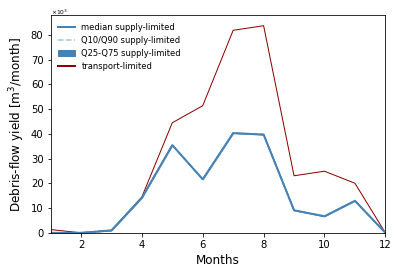

In [5]:
model.load_climate()
# model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()

In [15]:
hydro_out = pd.read_csv('/Users/varyabazilova/Desktop/paper2/sediment_scenarios/Hydro.out')
sed_out = pd.read_csv('/Users/varyabazilova/Desktop/paper2/sediment_scenarios/Sediment.out')



In [16]:
# hydro_out
sed_out.head()

,D,Q0,Q10,Q25,Q50,Q75,Q90,Q100,sc,ls,Qstl,Qdftl
0,1999-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1999-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1999-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1999-10-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

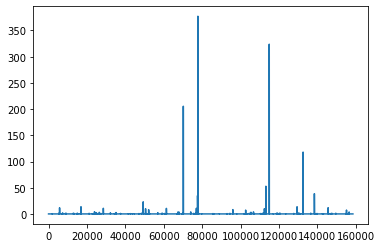

In [17]:
sed_out.ls.plot()

In [18]:
sed_out1 = sed_out.set_index('D')

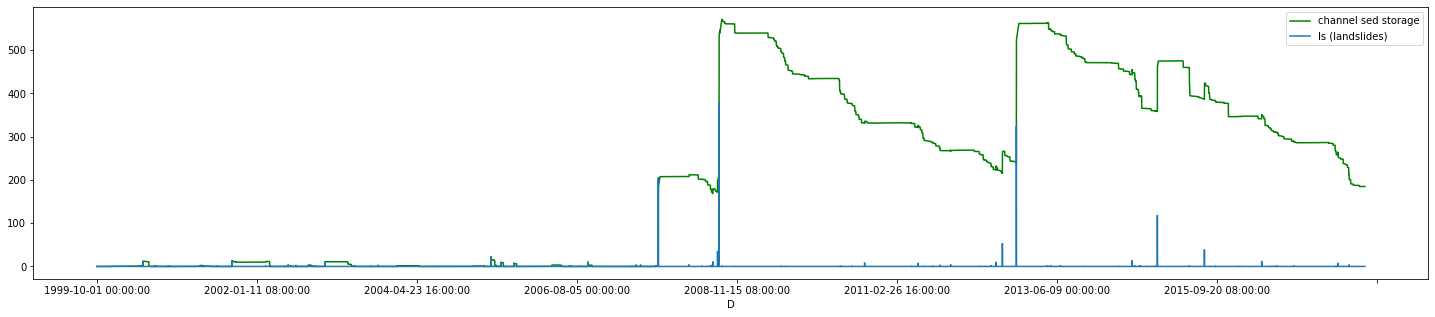

In [22]:

plt.figure(figsize = (25, 5))
sed_out1.sc.plot(color = 'green', label = 'channel sed storage')
# sed_out1.Qstl.plot(color = 'blue', label = 'Qstl')
# sed_out1.Qdftl.plot(color = 'orange', label = 'Qdftl') # [mm/h]
sed_out1.ls.plot(label = 'ls (landslides)')


plt.legend()

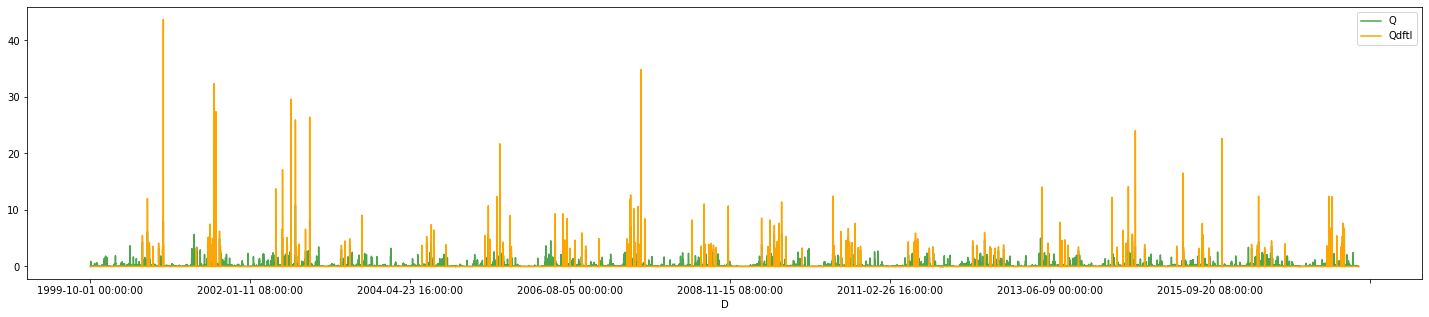

In [10]:

plt.figure(figsize = (25, 5))
# sed_out1.Qstl.plot(color = 'blue', label = 'Qdftl')
hydro_out.Q.plot(color = 'green', label = 'Q', alpha = 0.7)
sed_out1.Qdftl.plot(color = 'orange', label = 'Qdftl')

plt.legend()

<AxesSubplot:xlabel='D'>

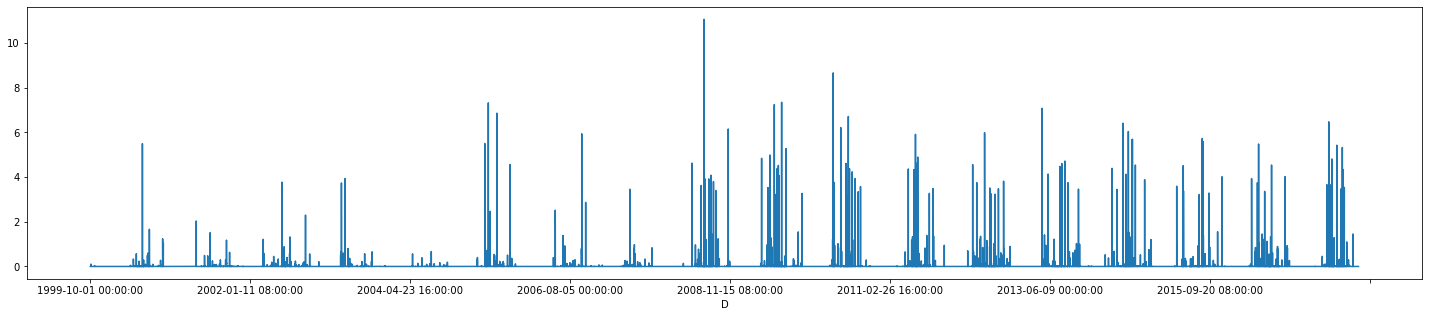

In [11]:
plt.figure(figsize = (25, 5))
sed_out1.Q100.plot()

In [12]:
import pandas as pd

# Create a sample DataFrame
data = {'Column X': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Set the constant 'c'
c = 2

# Add a new column with the cumulative sum based on the formula X(t) = X(t-1) + c
df['X(t)'] = df['Column X'].cumsum() + c

# Display the DataFrame
print(df)


   Column X  X(t)
0         1     3
1         2     5
2         3     8
3         4    12
4         5    17


In [13]:
import pandas as pd

# Create a sample DataFrame
data = {'Column X': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Set the constant 'c'
c = 20

# Add a new column 'X(t-1)' by shifting 'Column X'
df['X(t-1)'] = df['Column X'].shift(1, fill_value=0)

# Add a new column 'X(t)' using the formula X(t) = X(t-1) + c
df['X(t)'] = df['X(t-1)'].cumsum() + c

# Display the DataFrame
print(df)


   Column X  X(t-1)  X(t)
0         1       0    20
1         2       1    21
2         3       2    23
3         4       3    26
4         5       4    30


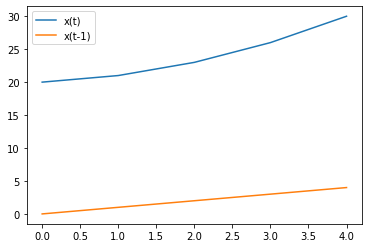

In [14]:
df['X(t)'].plot(label = 'x(t)')
df['X(t-1)'].plot(label = 'x(t-1)')

plt.legend()